In [22]:
import pandas as pd
import numpy as np
import datetime as dt
from matplotlib import pyplot as plt
from sklearn import linear_model
data_df=pd.read_excel('HR_Employee_Data.xlsx')
data_df.loc[data_df['salary']=='low','salary']=3
data_df.loc[data_df['salary']=='medium','salary']=2
data_df.loc[data_df['salary']=='high','salary']=1
data_df.head()

,Emp_Id,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,IND02438,0.38,0.53,2,157,3,0,1,0,sales,3
1,IND28133,0.80,0.86,5,262,6,0,1,0,sales,2
2,IND07164,0.11,0.88,7,272,4,0,1,0,sales,2
3,IND30478,0.72,0.87,5,223,5,0,1,0,sales,3
4,IND24003,0.37,0.52,2,159,3,0,1,0,sales,3


###### Training Model(Logistic Regression)

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_df[['average_montly_hours','time_spend_company','promotion_last_5years','salary']],data_df.left,test_size=0.33,random_state=0)
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [12]:
X_test.head()

,average_montly_hours,time_spend_company,promotion_last_5years,salary
1670,141,3,0,2
13378,194,3,0,2
10233,210,2,0,2
4719,177,2,0,3
7003,198,3,0,3


In [24]:
y_predicted=model.predict(X_test)

In [25]:
model.predict_proba(X_test)

array([[ 0.85363063,  0.14636937],
       [ 0.83420492,  0.16579508],
       [ 0.85950645,  0.14049355],
       ..., 
       [ 0.89046605,  0.10953395],
       [ 0.32061368,  0.67938632],
       [ 0.85610885,  0.14389115]])

###### Model accuracy score

In [26]:
model.score(X_test,y_test)

0.75535353535353533

In [27]:
y_predicted

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

###### Employees Attrition - Unhappy with Salary

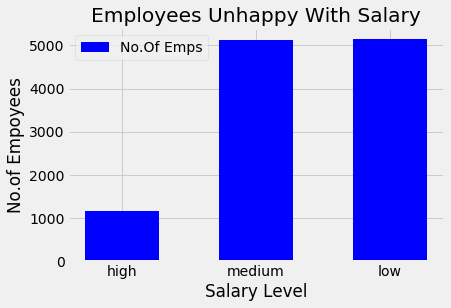

In [28]:
filt=(data_df['left']==0)
df_sal=data_df.loc[filt,['salary','left']].groupby(['salary']).count().reset_index()
#df_sal
from matplotlib import pyplot as plt
width=0.55
plt.style.use('fivethirtyeight')
sal=['high','medium','low']
plt.bar(df_sal.salary,df_sal.left,label='No.Of Emps',width=width,color='blue')
plt.xticks(df_sal.salary, sal)
plt.title('Employees Unhappy With Salary')
plt.xlabel('Salary Level')
plt.ylabel('No.of Empoyees')
plt.legend()
plt.show()

###### Employees Attrition - Unhappy with Salary and Promotion

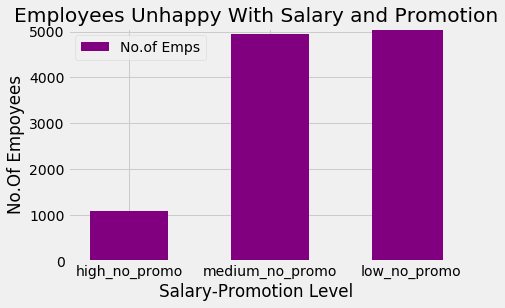

In [29]:
filt=((data_df['left']==0) & (data_df['promotion_last_5years']==0))
df_sal_promo=data_df.loc[filt,['salary','promotion_last_5years','left']].groupby(['salary','promotion_last_5years']).count().reset_index()
from matplotlib import pyplot as plt
plt.style.use('fivethirtyeight')
#df_sal_promo
width=0.55
sal=['high_no_promo','medium_no_promo','low_no_promo']
plt.bar(df_sal_promo.salary,df_sal_promo.left,label='No.of Emps',width=width,color='purple')
plt.xticks(df_sal_promo.salary, sal)
plt.title('Employees Unhappy With Salary and Promotion')
plt.xlabel('Salary-Promotion Level')
plt.ylabel('No.Of Empoyees')
plt.legend()
scale_factor =0.95
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
plt.xlim(xmin * scale_factor, xmax * scale_factor)
plt.ylim(ymin * scale_factor, ymax * scale_factor)
plt.show()

###### Departmentwise Employee Attrition

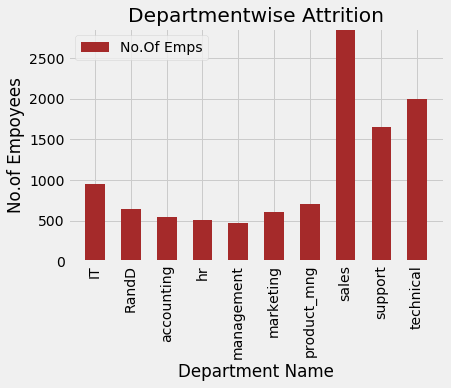

In [30]:
df_dept=data_df.loc[filt,['Department','left']].groupby(['Department']).count().reset_index()
#df_dept
from matplotlib import pyplot as plt
width=0.55
plt.style.use('fivethirtyeight')
x = np.arange(len(df_dept.Department))
#print(x)
plt.bar(x,df_dept.left,label='No.Of Emps',width=width,color='brown')
plt.xticks(x,df_dept.Department,rotation=90)
plt.title('Departmentwise Attrition')
plt.xlabel('Department Name')
plt.ylabel('No.of Empoyees')
plt.legend()
scale_factor =0.9
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
#plt.xlim(xmin * scale_factor, xmax * scale_factor)
plt.ylim(ymin * scale_factor, ymax * scale_factor)
plt.show()